# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet, or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course.**

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (**name it L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use everything you have learned in this course.** 


Following is to show how to plot to a file to save a graph:

In [1]:
library(httr)
library(jsonlite)
library(ggplot2)
library(viridis)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# comment this out to see the plot in the notebook
dev.off()

Loading required package: viridisLite


Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [2]:
bville=GET('https://www.mtbproject.com/data/get-trails?lat=36.369983&lon=-94.204830&maxDistance=30&maxResults=500&minStars=3&key=200238886-bdec80a528c173be6b3f279198042743')

golden=GET('https://www.mtbproject.com/data/get-trails?lat=39.756339&lon=-105.222305&maxDistance=30&maxResults=500&minStars=3&key=200238886-bdec80a528c173be6b3f279198042743')

dillon= GET('https://www.mtbproject.com/data/get-trails?lat=39.631185&lon=-106.044081&maxDistance=30&maxResults=500&minStars=3&key=200238886-bdec80a528c173be6b3f279198042743')

In [3]:
bville = fromJSON(rawToChar(bville$content))
bville = bville$trails
summary(bville)

golden = fromJSON(rawToChar(golden$content))
golden = golden$trails
summary(golden)

dillon = fromJSON(rawToChar(dillon$content))
dillon = dillon$trails
summary(dillon)

       id              name               type             summary         
 Min.   :5326357   Length:251         Length:251         Length:251        
 1st Qu.:7018784   Class :character   Class :character   Class :character  
 Median :7046131   Mode  :character   Mode  :character   Mode  :character  
 Mean   :6892415                                                           
 3rd Qu.:7050776                                                           
 Max.   :7055290                                                           
  difficulty            stars         starVotes        location        
 Length:251         Min.   :3.000   Min.   : 1.000   Length:251        
 Class :character   1st Qu.:4.000   1st Qu.: 1.000   Class :character  
 Mode  :character   Median :4.500   Median : 2.000   Mode  :character  
                    Mean   :4.349   Mean   : 6.438                     
                    3rd Qu.:5.000   3rd Qu.: 7.000                     
                    Max.   :5.000   

       id              name               type             summary         
 Min.   :  31804   Length:335         Length:335         Length:335        
 1st Qu.:2148956   Class :character   Class :character   Class :character  
 Median :7001974   Mode  :character   Mode  :character   Mode  :character  
 Mean   :5077227                                                           
 3rd Qu.:7040425                                                           
 Max.   :7055957                                                           
  difficulty            stars         starVotes        location        
 Length:335         Min.   :3.000   Min.   :  1.00   Length:335        
 Class :character   1st Qu.:3.300   1st Qu.:  2.00   Class :character  
 Mode  :character   Median :3.700   Median :  8.00   Mode  :character  
                    Mean   :3.716   Mean   : 24.67                     
                    3rd Qu.:4.000   3rd Qu.: 23.00                     
                    Max.   :5.000   

       id              name               type             summary         
 Min.   :  12376   Length:419         Length:419         Length:419        
 1st Qu.:5740733   Class :character   Class :character   Class :character  
 Median :6467896   Mode  :character   Mode  :character   Mode  :character  
 Mean   :5899466                                                           
 3rd Qu.:7033066                                                           
 Max.   :7055253                                                           
  difficulty            stars         starVotes         location        
 Length:419         Min.   :3.000   Min.   :  1.000   Length:419        
 Class :character   1st Qu.:3.300   1st Qu.:  2.000   Class :character  
 Mode  :character   Median :3.800   Median :  5.000   Mode  :character  
                    Mean   :3.792   Mean   :  9.566                     
                    3rd Qu.:4.200   3rd Qu.: 11.000                     
                    Max.   :5.

In [4]:
golden$difficulty[golden$difficulty=='green'] = 1
golden$difficulty[golden$difficulty=='greenBlue'] = 1
golden$difficulty[golden$difficulty=='blue'] = 2
golden$difficulty[golden$difficulty=='blueBlack'] = 3
golden$difficulty[golden$difficulty=='black'] = 4
golden$difficulty[golden$difficulty=='dblack'] = 5

In [5]:
bville$difficulty[bville$difficulty=='green'] = 1
bville$difficulty[bville$difficulty=='greenBlue'] = 1
bville$difficulty[bville$difficulty=='blue'] = 2
bville$difficulty[bville$difficulty=='blueBlack'] = 3
bville$difficulty[bville$difficulty=='black'] = 4
bville$difficulty[bville$difficulty=='dblack'] = 5

In [6]:
dillon$difficulty[dillon$difficulty=='green'] = 1
dillon$difficulty[dillon$difficulty=='greenBlue'] = 1
dillon$difficulty[dillon$difficulty=='blue'] = 2
dillon$difficulty[dillon$difficulty=='blueBlack'] = 3
dillon$difficulty[dillon$difficulty=='black'] = 4
dillon$difficulty[dillon$difficulty=='dblack'] = 5

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


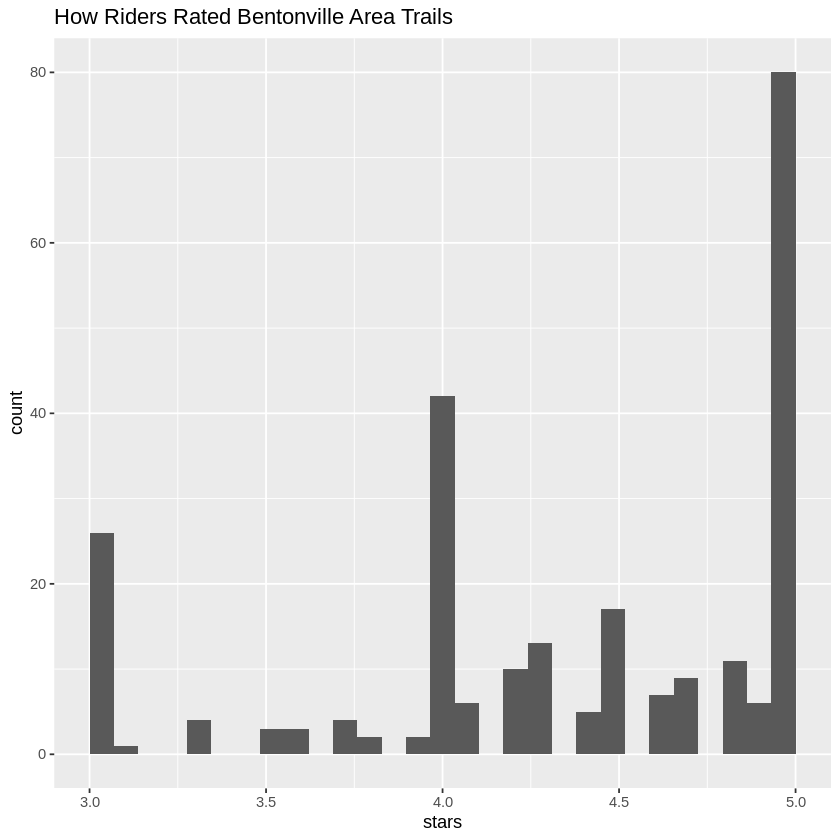

In [11]:
g=ggplot(bville, aes(x=stars)) + geom_histogram() + ggtitle('How Riders Rated Bentonville Area Trails')
g

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


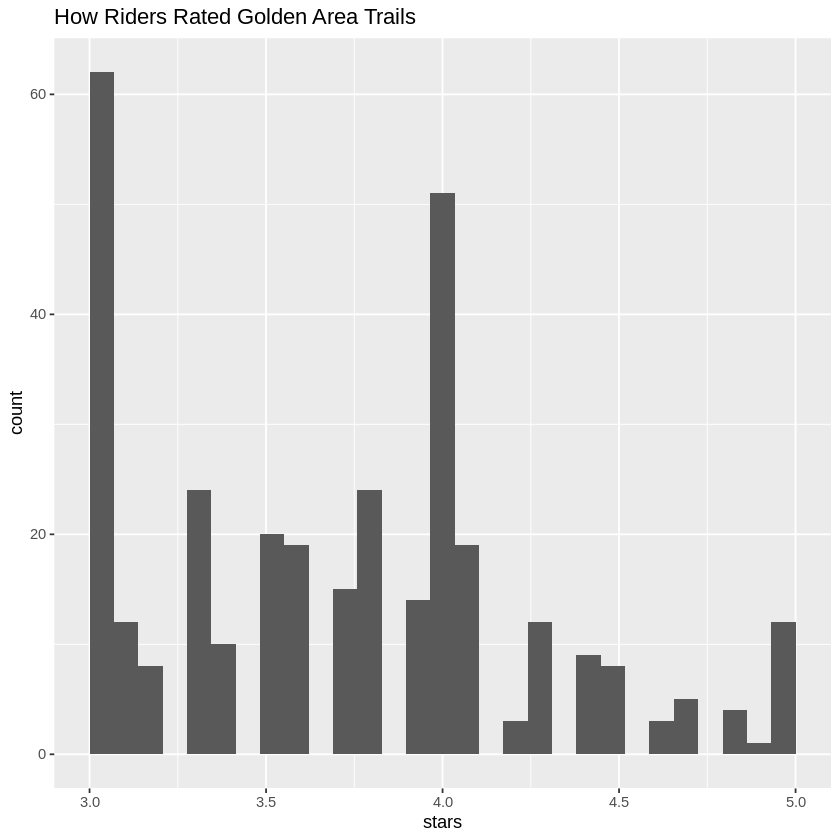

In [10]:
d=ggplot(golden, aes(x=stars)) + geom_histogram() + ggtitle('How Riders Rated Golden Area Trails')
d

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


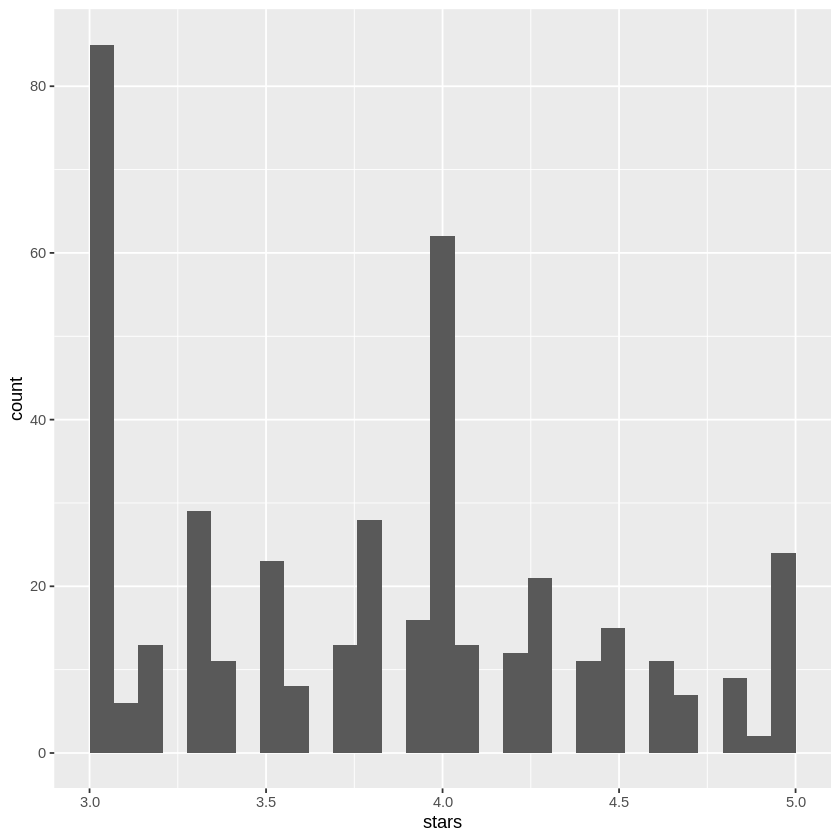

In [9]:
z=ggplot(dillon, aes(x=stars)) + geom_histogram()
z

Warning message:
“Transformation introduced infinite values in continuous y-axis”

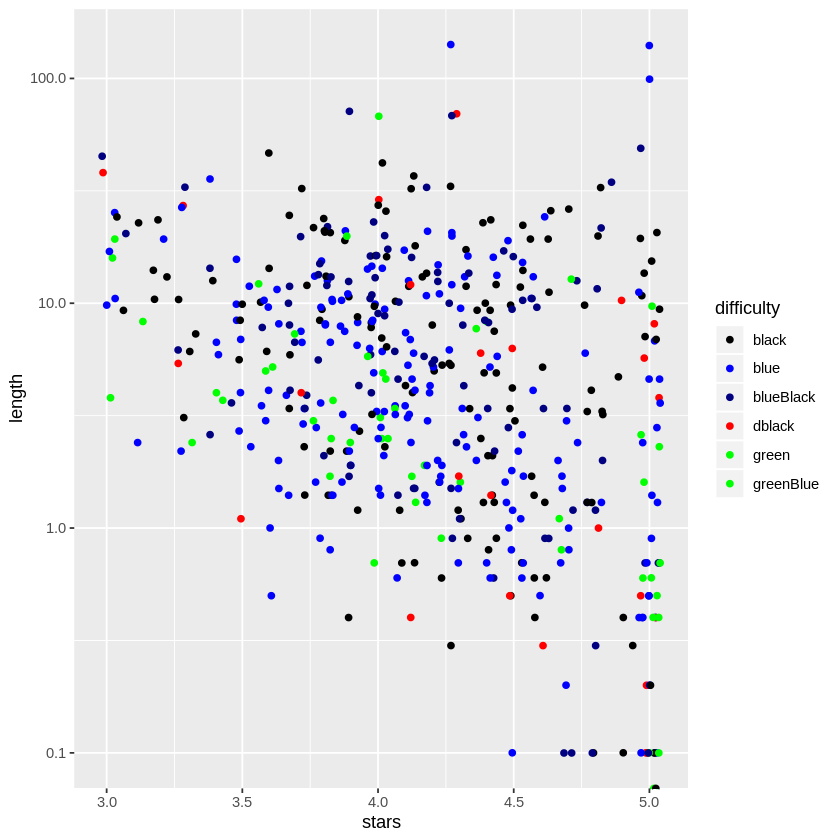

In [7]:
h=ggplot(dillon, aes(x=length, y=-descent, colour=difficulty)) + geom_point()
h + scale_x_log10() + scale_y_log10() + scale_color_viridis(option='D', discrete=TRUE) + ggtitle("Picking The Right Bike For Trail Difficulty") + labs(y="Total Descent (feet)", x= "Trail Length (miles)", colour="Difficulty Rating")

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

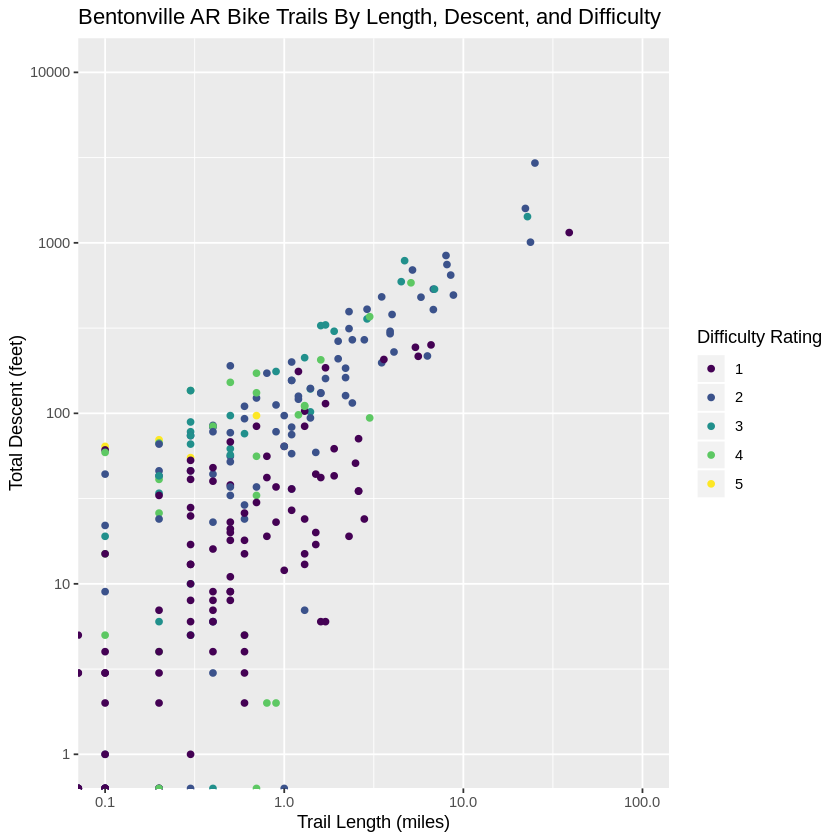

In [43]:
j=ggplot(bville, aes(x=length, y=-descent, colour=difficulty)) + geom_point()
j + scale_x_log10() + scale_y_log10() + scale_color_viridis(option='D', discrete=TRUE) + ggtitle("Bentonville AR Bike Trails By Length, Descent, and Difficulty") + labs(y="Total Descent (feet)", x= "Trail Length (miles)", colour="Difficulty Rating") + expand_limits(x=c(0,100), y=c(0, 10000))

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

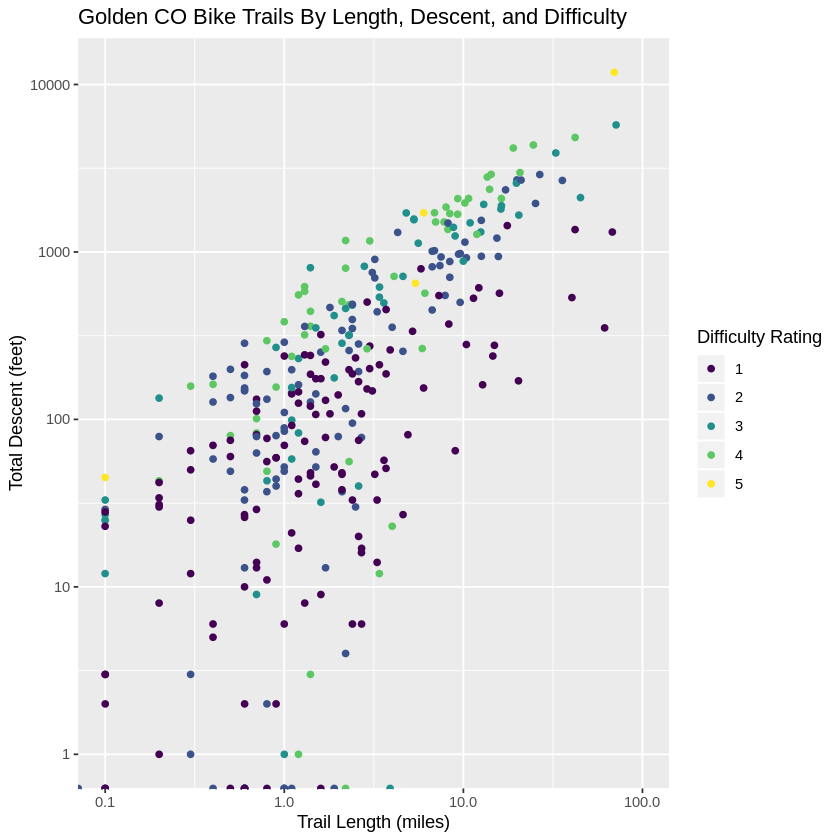

In [44]:
f=ggplot(golden, aes(x=length, y=-descent, colour=difficulty)) + geom_jitter()
f + scale_x_log10() + scale_y_log10() + scale_color_viridis(option='D', discrete=TRUE) + ggtitle("Golden CO Bike Trails By Length, Descent, and Difficulty") + labs(y="Total Descent (feet)", x= "Trail Length (miles)", colour="Difficulty Rating") + expand_limits(x=c(0,100), y=c(0, 10000))

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

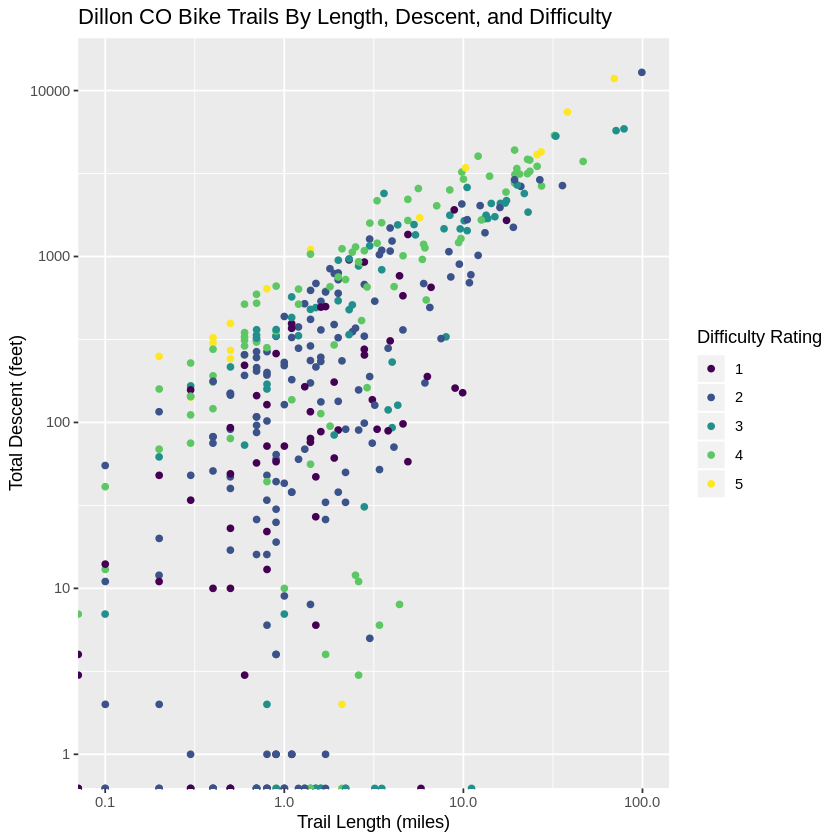

In [46]:
f=ggplot(dillon, aes(x=length, y=-descent, colour=difficulty)) + geom_jitter()
f + scale_x_log10() + scale_y_log10() + scale_color_viridis(option='D', discrete=TRUE) + ggtitle("Dillon CO Bike Trails By Length, Descent, and Difficulty") + labs(y="Total Descent (feet)", x= "Trail Length (miles)", colour="Difficulty Rating") + expand_limits(x=c(0,100), y=c(0, 10000))

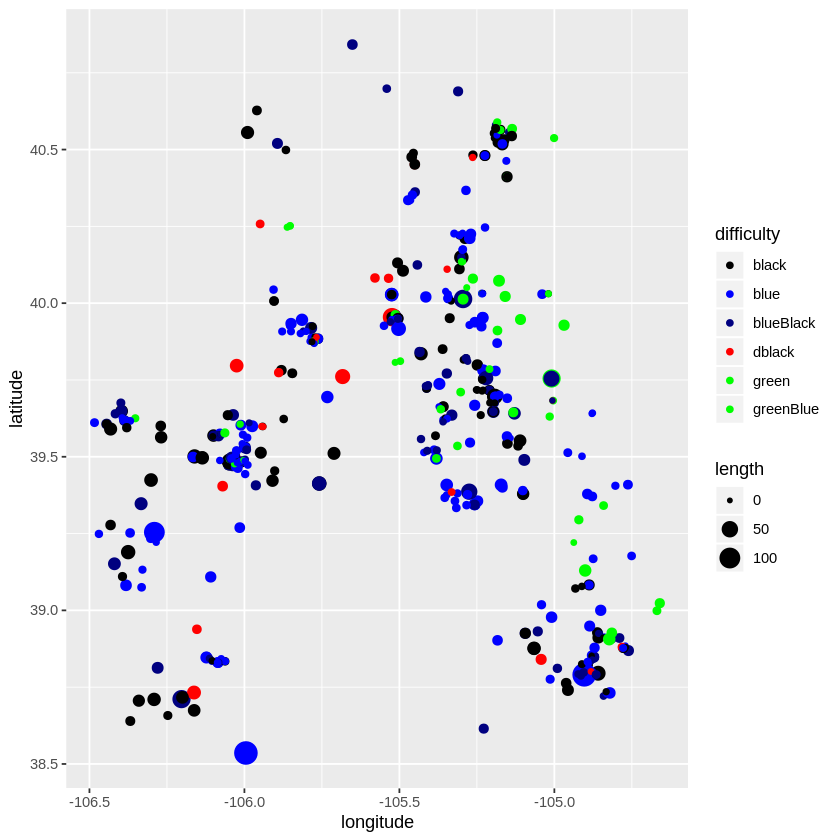

In [74]:
z=ggplot(denver, aes(x=longitude, y=latitude, colour=difficulty, size=length)) + geom_jitter()
z + scale_color_manual(values=c('black', 'blue', 'navy', 'red', 'green', 'green'))

---

# Common Pitfalls / Inefficiencies

**Pay attention to the following in your visualizations and stories:**


### Color coordinate among plots so that the same data attributes have the same color in all plots

you can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value. 


### Perceptual grouping is important! group and/or order values

In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

Pie chart: order wedges. 

In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 


### No lengthy text in x axis

Flip the axes of a bar chart so that string values (text) are readable on the y axis left to right, 

**or** 

at least put them slanted in x axis for better readibility. 


### Plot only those that tell an obvious story

**No crowded** scatter plots with useless linear regression lines that don't tell anything. Look at alternative plots to tell your story.


### If you have too many classes (discrete variables/categories), try to group them 

Instead of giving a color to each of them, you can put them in meaningful groups and color code.

For sequential variables, you can do the same thing by binning. 

Stepped color palettes may be more useful than smooth sequential palettes (especially for comparison in choropleth maps).

You can group/cluster data into meaningful chunks and display those as bubble charts, networks, geographical regions, etc. 

Do NOT dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be perceived immediately. 


### ANNOTATE!

**Tell** your audience what they are supposed to see. 

Use meaningful titles with a message, not dry titles. 

Use nice and concise axis labels. 

Use text annotations (look at the **examples in the lab notebook**).



### THEMING!

**Good looking** charts are more **convincing**. 

**Almost NEVER use the default color palette, default theme, default font.**


Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 



### Use space wisely!

**Balance the plots** to use space effectively.

Pay attention to data-ink ratio.

HAVE A FLOW left to right, top to bottom. 


